In [25]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Ruta a la carpeta principal que contiene todas las subcarpetas
root_dir = 'results'

# Carga del modelo

Obtenemos los datos para la carga del modelo de los diferentes archivos json de resultados.

In [27]:
# Lista para almacenar los datos
data = []

# Recorrer todas las subcarpetas y archivos en la carpeta root_dir
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.json'):
            # Construir la ruta completa al archivo json
            file_path = os.path.join(subdir, file)
            
            # Extraer device y precision del nombre del archivo
            parts = file.split('_')
            device, precision = parts[3], parts[1]
            

            # Leer el archivo JSON
            with open(file_path, 'r') as f:
                json_data = json.load(f)


            data.append({'Device': parts[3], 'Precision': parts[1],
                         'Avg CPU (%)': json_data['Load model']['Avg CPU'],
                         'Std dev CPU (%)': json_data['Load model']['Std dev CPU'],
                         'Max memory (%)': json_data['Load model']['Max memory'],
                         'Time (s)': json_data['Load model']['Max memory'],
                         }) # 'Total execution time': json_data['total execution time']
        

# Crear un DataFrame con los datos recopilados
df = pd.DataFrame(data)
df.head()

,Device,Precision,Avg CPU (%),Std dev CPU (%),Max memory (%),Time (s)
0,RPi3B,FP32,4.35,6.151829,43.1,43.1
1,Rock-USBCoral,INT8,0.00,0.000000,20.0,20.0
2,Rock4Plus,FP16,13.30,0.000000,18.5,18.5
3,Rock4Plus,INT8,50.00,0.000000,18.9,18.9
4,RPi4B,FP32,4.70,0.000000,13.9,13.9


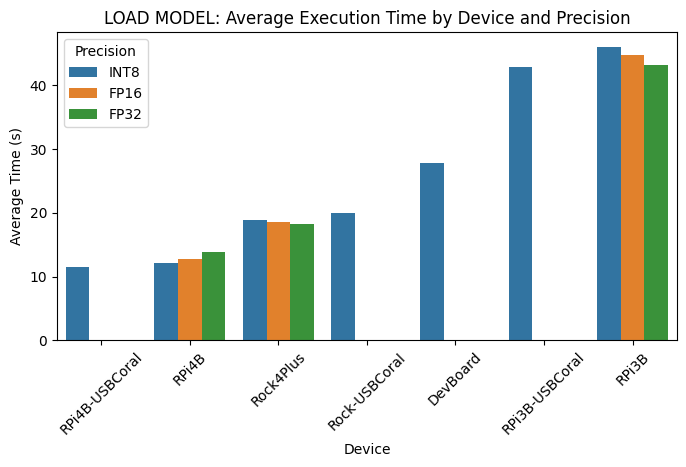

In [28]:
# Visualización 1: Comparación de tiempo promedio de ejecución por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Time (s)", hue="Precision", data=df.sort_values(by=['Time (s)','Precision'], ascending=[True, True]))
plt.title("LOAD MODEL: Average Execution Time by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Average Time (s)")
plt.legend(title="Precision")
plt.show()

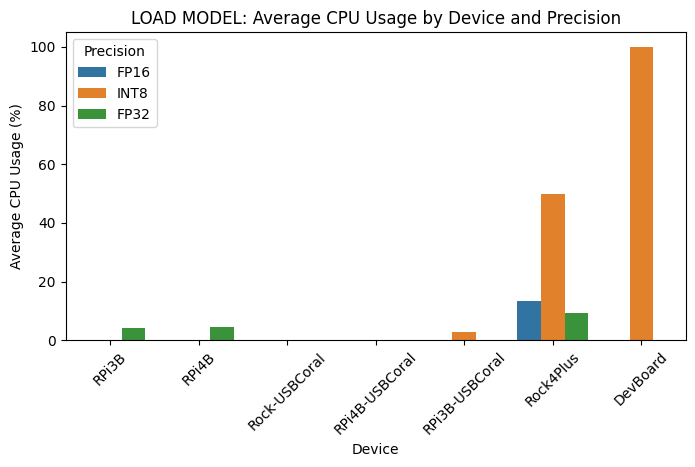

In [29]:
# Visualización 2: Uso promedio de CPU por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Avg CPU (%)", hue="Precision", data=df.sort_values(by=['Avg CPU (%)','Precision'], ascending=[True, True]))
plt.title("LOAD MODEL: Average CPU Usage by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Average CPU Usage (%)")
plt.legend(title="Precision")
plt.show()

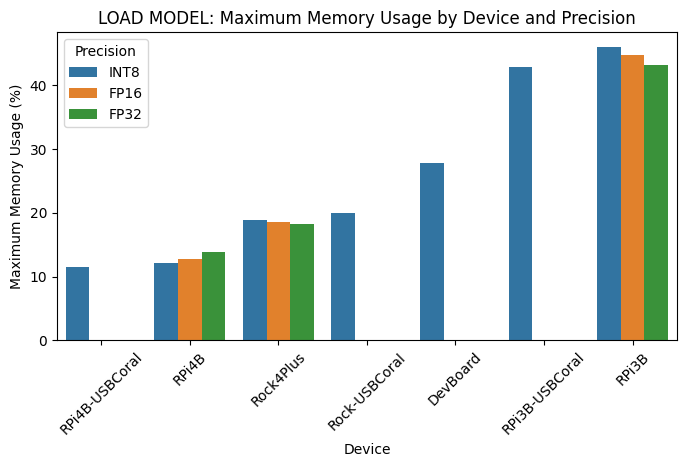

In [30]:
# Visualización 3: Uso máximo de memoria por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Max memory (%)", hue="Precision", data=df.sort_values(by=['Max memory (%)','Precision'], ascending=[True, True]))
plt.title("LOAD MODEL: Maximum Memory Usage by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Maximum Memory Usage (%)")
plt.legend(title="Precision")
plt.show()

# Inferencia

## Todos los datos

Analizamos los datos de todas las imágenes.

In [31]:
# Lista para almacenar los datos
data = []

# Recorrer todas las subcarpetas y archivos en la carpeta root_dir
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.json'):
            # Construir la ruta completa al archivo json
            file_path = os.path.join(subdir, file)
            
            # Extraer device y precision del nombre del archivo
            parts = file.split('_')
            device, precision = parts[3], parts[1]
            

            # Leer el archivo JSON
            with open(file_path, 'r') as f:
                json_data = json.load(f)



            # Variables para acumular los valores y contar las entradas
            total_time = 0
            total_avg_cpu = 0
            total_std_dev_cpu = 0
            total_max_memory = 0
            count = 0

            # Iterar sobre cada elemento en el diccionario
            for key, value in json_data.items():
                if isinstance(value, dict) and "Time" in value and "Avg CPU" in value:
                    total_time += value["Time"]
                    total_avg_cpu += value["Avg CPU"]
                    total_std_dev_cpu += value["Std dev CPU"]
                    total_max_memory += value["Max memory"]
                    count += 1

            # Calcular promedios y guardarlos
            data.append({'Device': parts[3], 'Precision': parts[1],
                         'Avg time (s)': total_time / count,
                         'Avg avg CPU (%)': total_avg_cpu / count,
                         'Avg std dev CPU (%)': total_std_dev_cpu / count,
                         'Avg max memory (%)': total_max_memory / count,
                         })
        

# Crear un DataFrame con los datos recopilados
df = pd.DataFrame(data)
df.head(50)

,Device,Precision,Avg time (s),Avg avg CPU (%),Avg std dev CPU (%),Avg max memory (%)
0,RPi3B,FP32,3.197144,26.367187,2.277776,61.22
1,Rock-USBCoral,INT8,0.123112,17.220000,3.846661,22.70
2,Rock4Plus,FP16,1.091000,22.562273,7.219165,22.88
3,Rock4Plus,INT8,1.078759,17.963788,2.837770,23.18
4,RPi4B,FP32,0.923772,27.351556,5.794889,14.98
5,RPi3B,FP16,3.282889,26.767063,3.042213,63.15
6,RPi3B,INT8,3.338699,27.033597,4.645243,55.68
7,DevBoard,INT8,0.105204,22.185000,4.475986,38.16
8,RPi4B-USBCoral,INT8,0.081759,36.750000,0.000000,12.88
9,RPi3B-USBCoral,INT8,0.500899,33.983667,11.181505,54.36


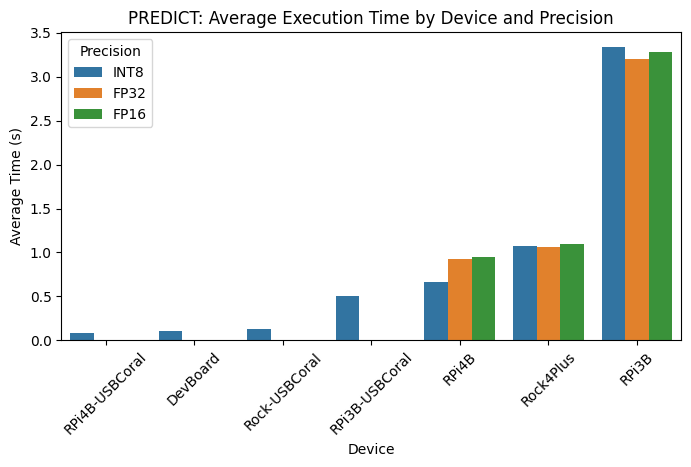

In [32]:
# Visualización 1: Comparación de tiempo promedio de ejecución por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Avg time (s)", hue="Precision", data=df.sort_values(by=['Avg time (s)','Precision'], ascending=[True, True]))
plt.title("PREDICT: Average Execution Time by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Average Time (s)")
plt.legend(title="Precision")
plt.show()

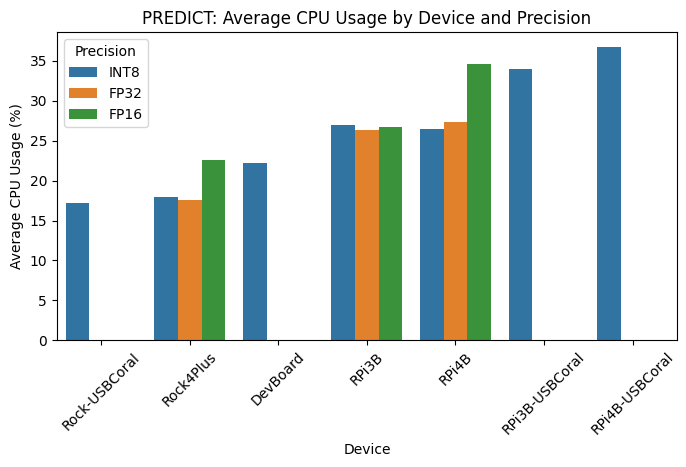

In [33]:
# Visualización 2: Uso promedio de CPU por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Avg avg CPU (%)", hue="Precision", data=df.sort_values(by=['Avg avg CPU (%)','Precision'], ascending=[True, True]))
plt.title("PREDICT: Average CPU Usage by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Average CPU Usage (%)")
plt.legend(title="Precision")
plt.show()

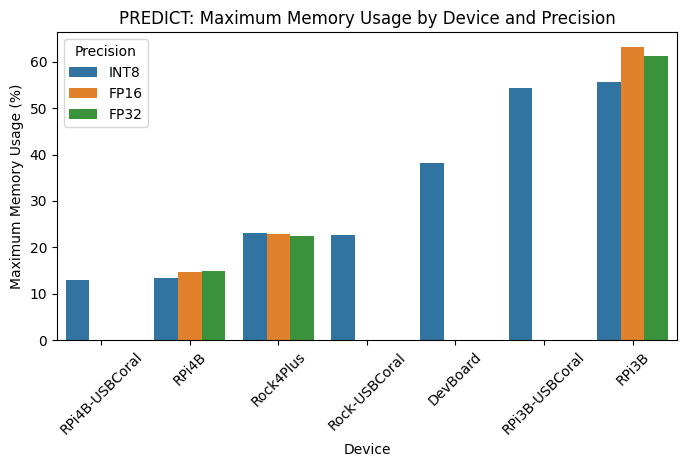

In [34]:
# Visualización 3: Uso máximo de memoria por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Avg max memory (%)", hue="Precision", data=df.sort_values(by=['Avg max memory (%)','Precision'], ascending=[True, True]))
plt.title("PREDICT: Maximum Memory Usage by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Maximum Memory Usage (%)")
plt.legend(title="Precision")
plt.show()

## Inferencia primera imagen

Analizamos los datos solo de la primera imagen introducida para ver si la primera tarda más.

Inference Coun 1

In [35]:
# Lista para almacenar los datos
data = []

# Recorrer todas las subcarpetas y archivos en la carpeta root_dir
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.json'):
            # Construir la ruta completa al archivo json
            file_path = os.path.join(subdir, file)
            
            # Extraer device y precision del nombre del archivo
            parts = file.split('_')
            device, precision = parts[3], parts[1]
            

            # Leer el archivo JSON
            with open(file_path, 'r') as f:
                json_data = json.load(f)



            # Iterar sobre cada elemento en el diccionario
            for key, value in json_data.items():
                if isinstance(value, dict) and "Count" in value and value["Count"] == 1:
                    
                    # Obtener valores y guardarlos
                    data.append({'Device': parts[3], 'Precision': parts[1],
                                'Avg time (s)': value["Time"],
                                'Avg avg CPU (%)': value["Avg CPU"],
                                'Avg std dev CPU (%)': value["Std dev CPU"],
                                'Avg max memory (%)': value["Max memory"],
                                })
                    break
        

# Crear un DataFrame con los datos recopilados
df = pd.DataFrame(data)
df.head()

,Device,Precision,Avg time (s),Avg avg CPU (%),Avg std dev CPU (%),Avg max memory (%)
0,RPi3B,FP32,3.237660,26.625000,7.237982,60.5
1,Rock-USBCoral,INT8,0.128110,8.350000,11.808683,22.6
2,Rock4Plus,FP16,1.158133,17.041667,6.727077,22.5
3,Rock4Plus,INT8,1.156183,15.583333,5.024817,22.9
4,RPi4B,FP32,0.989926,22.730000,8.054819,15.9


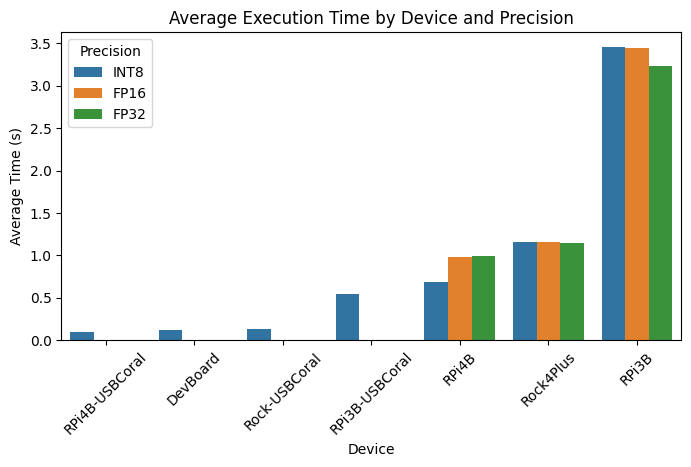

In [36]:
# Visualización 1: Comparación de tiempo promedio de ejecución por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Avg time (s)", hue="Precision", data=df.sort_values(by=['Avg time (s)','Precision'], ascending=[True, True]))
plt.title("Average Execution Time by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Average Time (s)")
plt.legend(title="Precision")
plt.show()

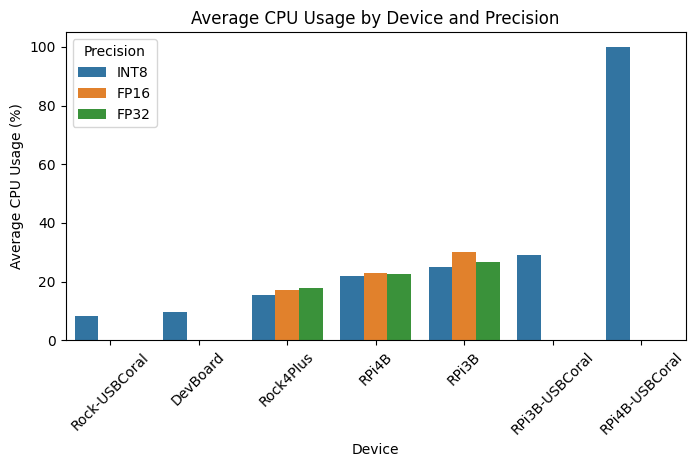

In [37]:
# Visualización 2: Uso promedio de CPU por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Avg avg CPU (%)", hue="Precision", data=df.sort_values(by=['Avg avg CPU (%)','Precision'], ascending=[True, True]))
plt.title("Average CPU Usage by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Average CPU Usage (%)")
plt.legend(title="Precision")
plt.show()

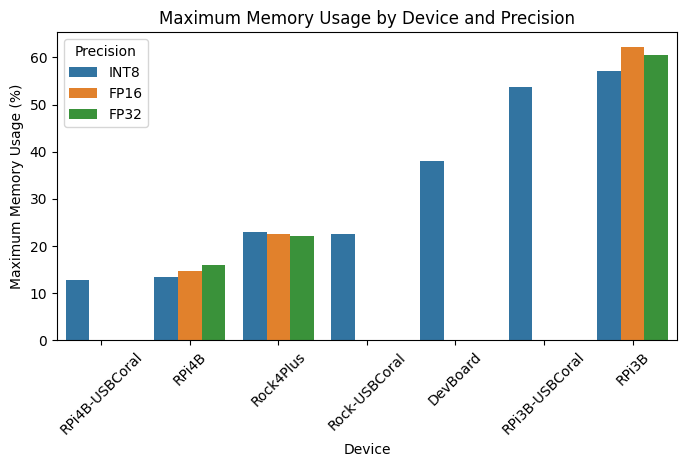

In [38]:
# Visualización 3: Uso máximo de memoria por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Avg max memory (%)", hue="Precision", data=df.sort_values(by=['Avg max memory (%)','Precision'], ascending=[True, True]))
plt.title("Maximum Memory Usage by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Maximum Memory Usage (%)")
plt.legend(title="Precision")
plt.show()

## Inferencia de todas las imágenes menos la primera.

ahora todos menos count 1

In [39]:
# Lista para almacenar los datos
data = []

# Recorrer todas las subcarpetas y archivos en la carpeta root_dir
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.json'):
            # Construir la ruta completa al archivo json
            file_path = os.path.join(subdir, file)
            
            # Extraer device y precision del nombre del archivo
            parts = file.split('_')
            device, precision = parts[3], parts[1]
            

            # Leer el archivo JSON
            with open(file_path, 'r') as f:
                json_data = json.load(f)



            # Variables para acumular los valores y contar las entradas
            total_time = 0
            total_avg_cpu = 0
            total_std_dev_cpu = 0
            total_max_memory = 0
            count = 0

            # Iterar sobre cada elemento en el diccionario
            for key, value in json_data.items():
                if isinstance(value, dict) and "Count" in value and value["Count"] != 1:
                    total_time += value["Time"]
                    total_avg_cpu += value["Avg CPU"]
                    total_std_dev_cpu += value["Std dev CPU"]
                    total_max_memory += value["Max memory"]
                    count += 1

            # Calcular promedios y guardarlos
            data.append({'Device': parts[3], 'Precision': parts[1],
                         'Avg time (s)': total_time / count,
                         'Avg avg CPU (%)': total_avg_cpu / count,
                         'Avg std dev CPU (%)': total_std_dev_cpu / count,
                         'Avg max memory (%)': total_max_memory / count,
                         })
        

# Crear un DataFrame con los datos recopilados
df = pd.DataFrame(data)
df.head()

,Device,Precision,Avg time (s),Avg avg CPU (%),Avg std dev CPU (%),Avg max memory (%)
0,RPi3B,FP32,3.192642,26.338542,1.726642,61.300000
1,Rock-USBCoral,INT8,0.122557,18.205556,2.961992,22.711111
2,Rock4Plus,FP16,1.083541,23.175673,7.273842,22.922222
3,Rock4Plus,INT8,1.070156,18.228283,2.594764,23.211111
4,RPi4B,FP32,0.916422,27.865062,5.543785,14.877778


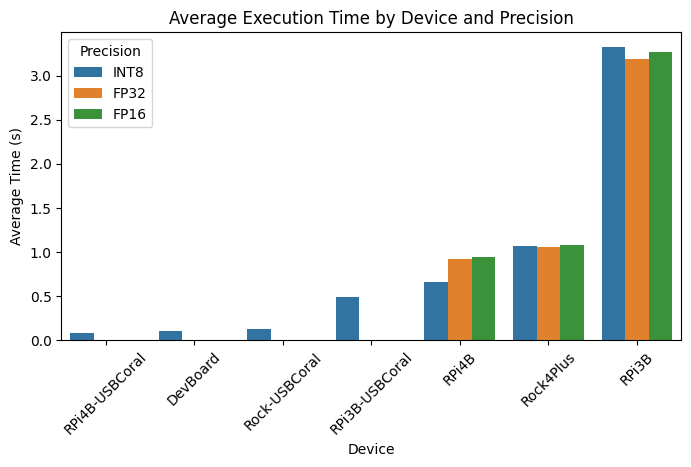

In [40]:
# Visualización 1: Comparación de tiempo promedio de ejecución por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Avg time (s)", hue="Precision", data=df.sort_values(by=['Avg time (s)','Precision'], ascending=[True, True]))
plt.title("Average Execution Time by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Average Time (s)")
plt.legend(title="Precision")
plt.show()

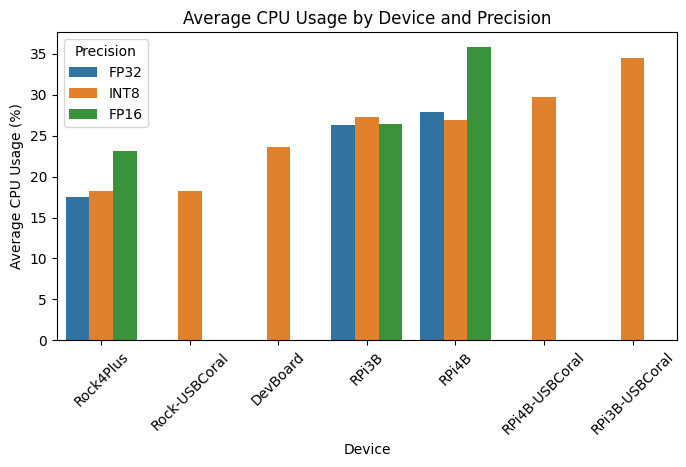

In [41]:
# Visualización 2: Uso promedio de CPU por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Avg avg CPU (%)", hue="Precision", data=df.sort_values(by=['Avg avg CPU (%)','Precision'], ascending=[True, True]))
plt.title("Average CPU Usage by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Average CPU Usage (%)")
plt.legend(title="Precision")
plt.show()

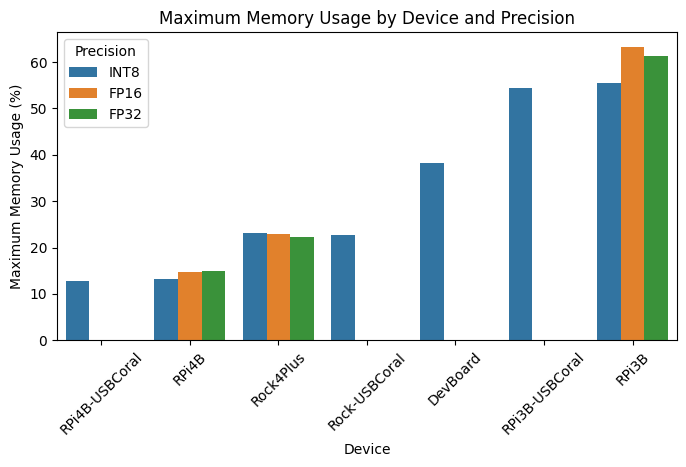

In [42]:
# Visualización 3: Uso máximo de memoria por dispositivo
plt.figure(figsize=(8, 4))
sns.barplot(x="Device", y="Avg max memory (%)", hue="Precision", data=df.sort_values(by=['Avg max memory (%)','Precision'], ascending=[True, True]))
plt.title("Maximum Memory Usage by Device and Precision")
plt.xticks(rotation=45)
plt.xlabel("Device")
plt.ylabel("Maximum Memory Usage (%)")
plt.legend(title="Precision")
plt.show()